读取中文csv

In [3]:
import pandas as pd
import csv

data=pd.read_csv("car_data.csv",encoding="gbk")
# print(data)

from sklearn.cluster import KMeans
from sklearn import preprocessing

train_x=data[["人均GDP" ,"城镇人口比重",  "交通工具消费价格指数",  "百户拥有汽车量"]]

# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()

min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
pd.DataFrame(train_x).to_csv('temp.csv',index=False)
print(train_x)

kmeans=KMeans(n_clusters=3)
predict_y=kmeans.fit_predict(train_x)
result=pd.concat((data,pd.DataFrame(predict_y)),axis=1)
print(result)
  

[[0.95671642 0.95344646 0.         1.        ]
 [1.         0.86784803 1.         0.47285626]
 [0.26119403 0.34374531 0.40653595 0.55613819]
 [0.22238806 0.40501577 0.39738562 0.41054904]
 [0.61940299 0.50923562 0.41699346 0.4420111 ]
 [0.5119403  0.62081394 0.54901961 0.18075262]
 [0.32835821 0.46088001 0.16078431 0.18352869]
 [0.24477612 0.50743355 0.60392157 0.        ]
 [0.9761194  1.         0.73986928 0.39666872]
 [0.68358209 0.58852681 0.39607843 0.57464528]
 [0.63880597 0.59453371 0.10065359 0.88093769]
 [0.13731343 0.33173149 0.56601307 0.12060457]
 [0.45970149 0.53146118 0.63137255 0.38679827]
 [0.14477612 0.34524703 0.65228758 0.11073411]
 [0.45820896 0.4240877  0.3372549  0.70419494]
 [0.18358209 0.26820844 0.61045752 0.27051203]
 [0.2641791  0.4373029  0.68366013 0.13571869]
 [0.2        0.33623667 0.53594771 0.23226403]
 [0.5119403  0.65760625 0.2130719  0.7840839 ]
 [0.13134328 0.28667968 0.83137255 0.36859963]
 [0.18507463 0.41732993 0.82875817 0.32479951]
 [0.26716418 

PCA降维

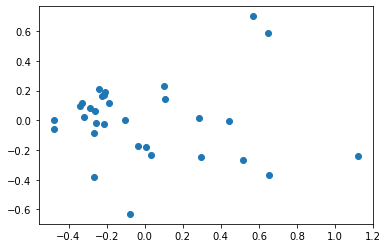

In [12]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as skPCA
pca=skPCA(n_components=2)#降到2维
transformed=pd.DataFrame(pca.fit_transform(train_x))

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(transformed[0],transformed[1])

plt.show()


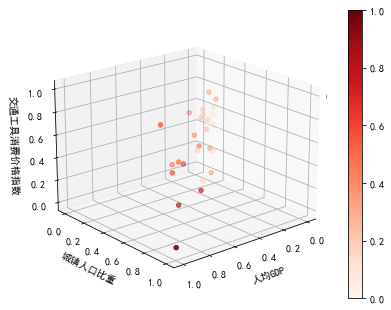

In [23]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig,rect=[0,0,1,1],elev=20,azim=50)#rect 是表示top left width height参数，elev和azim是调整视觉角度
temp = ax.scatter(train_x[:,0],train_x[:,1],train_x[:,2],c=train_x[:,3],cmap='Reds')#cmp=colormaps

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
ax.set_xlabel('人均GDP')
ax.set_ylabel('城镇人口比重')
ax.set_zlabel('交通工具消费价格指数')
plt.colorbar(temp)
plt.show()